# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href='#intro'>Introduction</a></li>
<li><a href='#research-question'>Research Question</a></li>
<li><a href='#wrangling'>Data Wrangling</a></li>
<li><a href='#eda'>Exploratory Data Analysis</a></li>
<li><a href='#conclusions'>Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains information on medical appointments and focuses on whether or not patients showed up for their scheduled appointments. Each observation represents a single medical appointment and includes patient demographic information, scheduling details, health conditions, and whether the patient received an SMS reminder.

The primary variable of interest is whether a patient did not show up for their appointment. The goal of this investigation is to explore which factors are associated with appointment attendance and to identify patterns that may help predict no-show behavior.

### Dataset Description

The dataset consists of one table with 110,527 rows and 14 columns. Each row corresponds to a unique medical appointment. There are no multiple tables or relationships to resolve.

### Column Descriptions

- **PatientID**  
  A unique identifier for each patient. 

- **AppointmentID**  
  A unique identifier for each medical appointment.

- **Gender**  
  Indicates the patient’s gender (Male or Female).

- **AppointmentDay**  
  The date of the actual appointment when the patient was expected to visit the clinic.

- **ScheduledDay**  
  The date and time when the appointment was scheduled.

- **Age**  
  The patient’s age in years.

- **Neighbourhood**  
  The location where the appointment takes place.

- **Scholarship**  
  Indicates whether the patient is enrolled in a government social welfare program (Bolsa Família), which may serve as a proxy for socioeconomic status.

- **Hipertension**  
  Indicates whether the patient has been diagnosed with hypertension (True or False).

- **Diabetes**  
  Indicates whether the patient has diabetes (True or False).

- **Alcoholism**  
  Indicates whether the patient has a history of alcoholism (True or False).

- **Handcap**  
  Indicates whether the patient has a disability (True or False).

- **SMS_received**  
  Indicates whether the patient received one or more SMS reminders before the appointment.

- **No-show**  
  Indicates whether the patient missed the appointment (True or False).


<a id='research-question'></a>
## Research Question
**What factors are associated with a patient not showing up for their scheduled medical appointment?**

This analysis evaluates the association between appointment non-attendance and two explanatory variables. Specifically, the following sections examine two hypothesized factors: scheduling delay (measured in days as `waiting_days`) and receipt of an SMS reminder (sms_received).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In this section, the dataset is loaded, inspected for cleanliness, and prepared for analysis. Each data cleaning step is documented and justified to ensure the dataset is suitable for exploratory analysis.

### Loading the Dataset

The dataset is loaded from a CSV file into a pandas DataFrame. Initial inspection is performed to understand its structure, size, and basic properties.


In [2]:
# Load the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Display dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### General Properties

To assess the overall quality of the data, several checks are performed, including the size of the dataset, data types, summary statistics, missing values, and duplicate records.


In [3]:
# Display size of dataframe
df.shape

(110527, 14)

In [4]:
# Inspect column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Summary statistics
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [6]:
# Check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Check for minimum age
df['Age'].min()

-1

#### Initial Findings

- The dataset contains over 100,000 rows and 14 columns.
- The `PatientId` column is stored as a float, even though it represents an identifier rather than a numeric measurement.
- Several binary variables (e.g., `Scholarship`, `Hypertension`, `Diabetes`, `Alcoholism`, `Handicap`, `SMS_received`) are stored as integers and can be more appropriately represented as categorical data.
- Time-related variables (e.g., `ScheduledDay` and `AppointmentDay`) are stored as object types and should be converted to datetime format.
- The `Age` column contains at least one invalid value, with a minimum age of −1.
- The raw dataset contains no missing values; however, invalid datetime strings will be coerced to NaT during conversion and affected rows are removed.
- There are no duplicate rows in the dataset.

### Data Cleaning

Based on the initial inspection, the following data cleaning steps are necessary:

1. **Rename columns** to improve readability and ensure consistent naming conventions.
2. **Convert scheduled_day and appointment_day to datetime**. Any records that could not be parsed were coerced to NaT and removed.
3. **Create a waiting time feature**. Records with negative waiting time were removed (waiting_days < 0).
4. **Recode the target variable (`no_show_raw`)** into a binary numeric format (`no_show`) for easier aggregation and comparison.
5. **Remove invalid data**.
6. **Convert identifier columns to appropriate data types** to reflect their role as identifiers.
7. **Convert binary indicator variables to categorical data types** to better represent their qualitative nature.

In [9]:
# Rename columns
df = df.rename(columns={
    'PatientId': 'patient_id',
    'AppointmentID': 'appointment_id',
    'Gender': 'gender',
    'ScheduledDay': 'scheduled_day',
    'AppointmentDay': 'appointment_day',
    'Age': 'age',
    'Neighbourhood': 'neighbourhood',
    'Scholarship': 'scholarship',
    'SMS_received': 'sms_received',
    'Hipertension': 'hypertension',
    'Diabetes': 'diabetes',
    'Alcoholism': 'alcoholism',
    'Handcap': 'handicap',
    'No-show': 'no_show_raw',
})

In [10]:
# Convert date columns to datetime
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'], errors='coerce', utc=True).dt.tz_convert(None).dt.normalize()
df['appointment_day'] = pd.to_datetime(df['appointment_day'], errors='coerce', utc=True).dt.tz_convert(None).dt.normalize()

# Drop rows where datetime parsing failed (NaT)
df = df.dropna(subset=['scheduled_day', 'appointment_day'])

In [11]:
# Create waiting time feature + remove invalid sequences
df['waiting_days'] = (df['appointment_day'] - df['scheduled_day']).dt.days
df = df[df['waiting_days'] >= 0]

In [12]:
# Recode No-show to binary
df['no_show'] = (df['no_show_raw'].astype('string').str.strip().str.lower() == 'yes').astype(int)

df = df.drop(columns=['no_show_raw'])

In [13]:
# Remove invalid age values
df = df[df['age'] >= 0]

In [14]:
# Treat binary indicator variables as categorical
binary_cols = ['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']
df[binary_cols] = df[binary_cols].astype('category')

In [15]:
# Treat IDs as strings
id_cols = ['patient_id', 'appointment_id']
df[id_cols] = df[id_cols].astype('string')

<a id='eda'></a>
## Exploratory Data Analysis


In [16]:
def plot_rate_bar(summary_df, rate_col, title, xlabel, ylabel, rotate_xticks=False):
    ax = (summary_df[rate_col] * 100).plot(kind='bar', figsize=(8, 5), legend=False)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if rotate_xticks:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
   
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.1f}%',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=10,
            xytext=(0, 3),
            textcoords='offset points'
        )

    plt.tight_layout()
    plt.show()

### Research Question 1: Is longer waiting time associated with a higher no-show rate?

To evaluate this, I compare no-show rates across binned values of `waiting_days`.

In [17]:
bins = [0, 1, 4, 8, 15, 31, df['waiting_days'].max() + 1]
labels = ['0', '1–3', '4–7', '8–14', '15–30', '31+']

df['waiting_days_bin'] = pd.cut(df['waiting_days'], bins=bins, right=False, labels=labels)

In [18]:
# Compute percentage (rate) of 'Yes' per bin
summary_wait = df.groupby('waiting_days_bin').agg(
    no_show_rate=('no_show', 'mean'),
    n=('no_show', 'size')
)

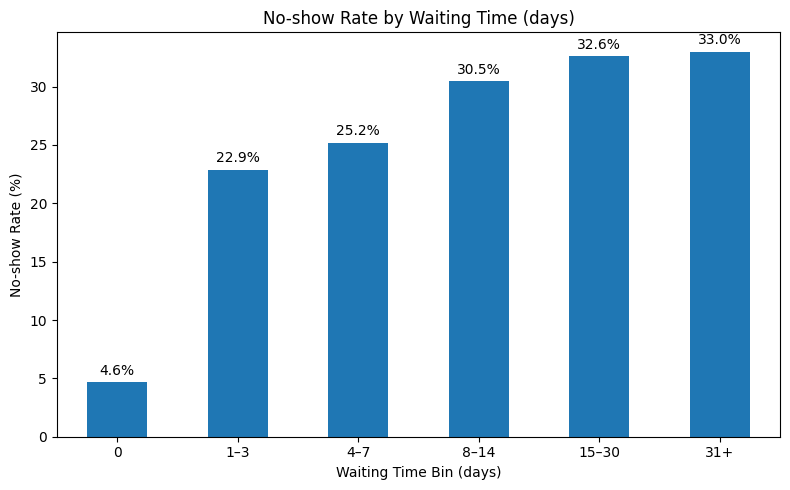

,no_show_rate,n
waiting_days_bin,,
0,0.046471,38562
1–3,0.228893,14675
4–7,0.252027,17510
8–14,0.304699,12025
15–30,0.325888,17371
31+,0.330025,10378


In [19]:
# Plot waiting time bins
plot_rate_bar(
    summary_wait,
    rate_col='no_show_rate',
    title='No-show Rate by Waiting Time (days)',
    xlabel='Waiting Time Bin (days)',
    ylabel='No-show Rate (%)'
)

summary_wait

The bar chart shows that the no-show rate increases across successive waiting-time bins. Same-day appointments have the lowest no-show rate (4.6%, n=38,562). The rate is substantially higher for appointments scheduled 1–3 days in advance (22.9%, n=14,675) and then rises further for longer waits: 4–7 days (25.2%, n=17,510), 8–14 days (30.5%, n=12,025), 15–30 days (32.6%, n=17,371), and 31+ days (33.0%, n=10,378). The largest step increase occurs between the 0-day and 1–3 day bins. Overall, this pattern suggests that longer waiting time is associated with a higher no-show rate.

### Research Question 2: Is SMS reminder associated with a lower no-show rate?

To evaluate this, I compare no-show rates between appointments with and without an SMS reminder (`sms_received`), and I also check whether the two groups differ in average waiting time.

In [20]:
# Compute percentage (rate) of 'no_show_rate' by 'sms_received'
summary_sms = df.groupby('sms_received').agg(
    no_show_rate=('no_show', 'mean'),
    n=('no_show', 'size')
)

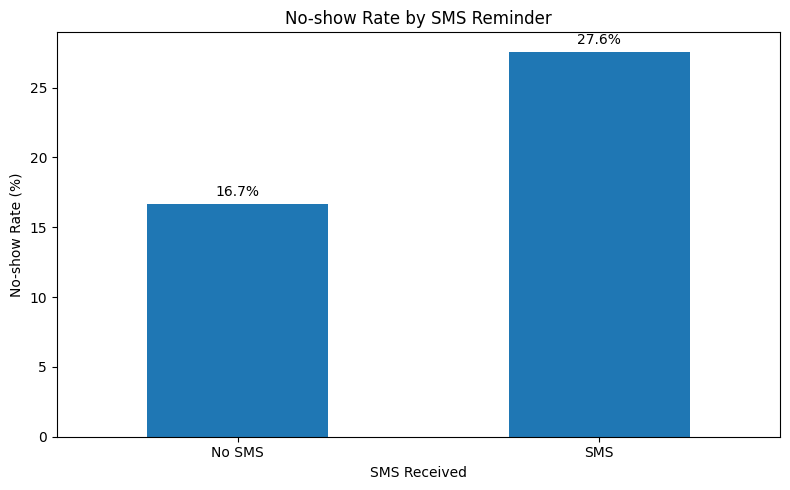

,no_show_rate,n
sms_received,,
No SMS,0.166980,75039
SMS,0.275745,35482


In [21]:
# Plot no show rates
summary_sms = summary_sms.rename(index={0: 'No SMS', 1: 'SMS'})

plot_rate_bar(
    summary_sms,
    rate_col='no_show_rate',
    title='No-show Rate by SMS Reminder',
    xlabel='SMS Received',
    ylabel='No-show Rate (%)'
)

summary_sms

In [22]:
# Compare average waiting days by sms group
waiting_by_sms = df.groupby('sms_received')['waiting_days'].agg(['mean', 'median', 'count'])
waiting_by_sms

,mean,median,count
sms_received,,,
0,6.007983,0.0,75039
1,19.016713,14.0,35482


The bar chart compares no-show rates between appointments with and without an SMS reminder (sms_received). Appointments without an SMS reminder have a lower no-show rate (16.7%, n=75,039) than appointments where an SMS reminder was recorded (27.6%, n=35,482). However, the SMS group also has substantially longer waiting times (mean 19.0 vs 6.0 days; median 14 vs 0), suggesting that reminders may be preferentially used for appointments scheduled further in advance.

### Research Question 3: Is age associated with no-show rate?
To evaluate this, I first examine the distribution of age (1D), and then compare no-show rates across age groups.

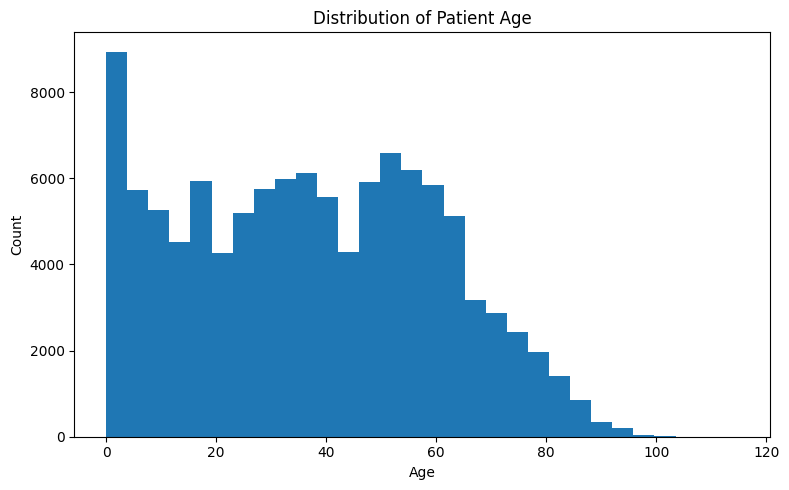

In [23]:
# Plot age distribution

plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=30)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [24]:
# No-show rate by age group
age_bins = [0, 18, 30, 45, 60, 75, df['age'].max() + 1]
age_labels = ['0–17', '18–29', '30–44', '45–59', '60–74', '75+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [25]:
# Compute percentage (rate) of 'no_show_rate' by 'age'
age_summary = df.groupby('age_group').agg(
    no_show_rate=('no_show', 'mean'),
    n=('no_show', 'size')
)

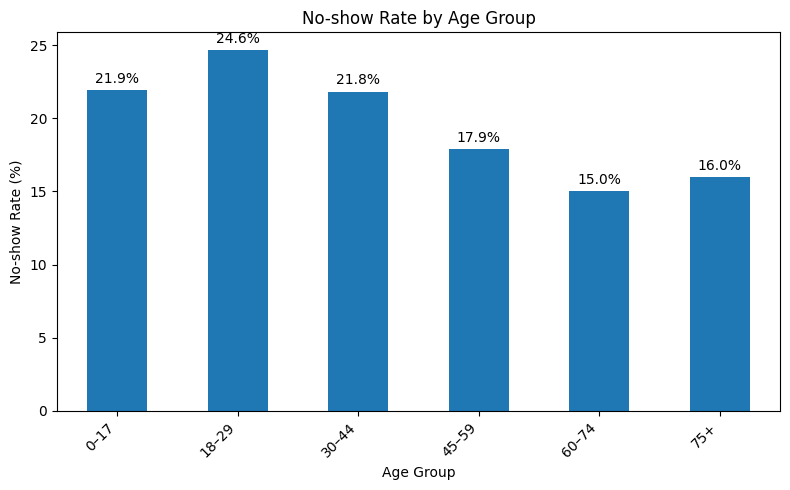

,no_show_rate,n
age_group,,
0–17,0.219008,27378
18–29,0.246398,16729
30–44,0.218201,22021
45–59,0.178718,23221
60–74,0.150358,15237
75+,0.160067,5935


In [26]:
plot_rate_bar(
    age_summary,
    rate_col='no_show_rate',
    title='No-show Rate by Age Group',
    xlabel='Age Group',
    ylabel='No-show Rate (%)',
    rotate_xticks=True
)

age_summary

The bar chart compares no-show rates across age groups. The no-show rate is highest among ages 18–29 (24.6%, n=16,729). No-show rates are similar for 0–17 (21.9%, n=27,378) and 30–44 (21.8%, n=22,021), then decline for older age groups: 45–59 (17.9%, n=23,221) and 60–74 (15.0%, n=15,237). The 75+ group shows a slightly higher rate than 60–74 (16.0%, n=5,935), though it also has the smallest sample size. Overall, the pattern suggests that no-show rates tend to decrease with increasing age after early adulthood, indicating an association between age and appointment attendance in this dataset

<a id='conclusions'></a>
## Conclusions
This analysis explored factors associated with appointment no-shows, focusing on scheduling delay (waiting_days), SMS reminders (sms_received), and patient age (age_group). No-show rates were higher for longer waiting times and were generally higher among younger age groups. The SMS-reminder group also showed a higher no-show rate, but this group had substantially longer waiting times, suggesting the observed relationship may reflect targeting or confounding rather than an effect of reminders.

### Limitations
These results are based on observational, descriptive comparisons without statistical testing or control for confounders; therefore, they do not establish causation. 

Moreover, variables such as appointment type, reminder timing, and prior attendance history were not available and could influence the observed patterns.

### Future work
Further analysis could compare SMS vs no-SMS appointments within the same waiting-time bins and/or use a multivariable model (e.g., logistic regression) to adjust for age and waiting time. Additional data fields (appointment type and reminder send time) would improve interpretability.

In [27]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 773288 bytes to Investigate_a_Dataset.html
